This is a simple neural network model for predicting the MNIST dataset into 5 different classes [1,2,3,4,5]. So 
we will train our model on a subset, and corresponding labels and test it on a testing set and its corresponding labels and see how well our algorithm performs

In [56]:
#Importing Libraries and files
import numpy as np, scipy, matplotlib, pylab, glob,os
from pylab import *
import tensorflow as tf
from PIL import Image
import random
import pandas as pd



Let us look at a sample of what the labels file looks like and a sample of the image used in the training 

In [55]:
df = pd.read_table("labels/train_label.txt",header=None,names=['training label'])
print (df.head())


   training label
0               5
1               4
2               1
3               2
4               1


In [65]:
 Image.open('train_data/00001.jpg')

In [50]:
f = open("labels/train_label.txt","r")
l = [line for line in f]
g = open("labels/test_label.txt","r")
l1 = [line for line in g]

In [40]:
#Creating a one hot encoding for the target variable
y = np.zeros([len(l),5])
i=0
while (i<25112):
    if (l[i]=="1\n"):
        y[i][0] = 1
    if (l[i] == "2\n"):
        y[i][1] = 1
    if (l[i]=="3\n"):
        y[i][2] = 1
    if (l[i] == "4\n"):
        y[i][3] = 1
    if (l[i]=="5\n"):
        y[i][4] = 1
    i = i+1
    
y_test=np.zeros([len(l1),5])
x_test = np.ones([len(l1),784])
w_test = np.ones([5,len(l1)])
i = 0
while (i<len(l1)):
    if (l1[i]=="1\n"):
        y_test[i][0] = 1
    if (l1[i] == "2\n"):
        y_test[i][1] = 1
    if (l1[i]=="3\n"):
        y_test[i][2] = 1
    if (l1[i] == "4\n"):
        y_test[i][3] = 1
    if (l1[i]=="5\n"):
        y_test[i][4] = 1
    i = i+1

In [41]:
w = np.ones([5,785])
reg = 0.001
w = np.asarray(w)
filelist = sorted(glob.glob('train_data/*.jpg'))
x = np.ones([len(l),784])
x = np.asarray(x)
learningrate = 0.01
iterations = 10000
i = 0
while(i<len(filelist)):
    im = Image.open(filelist[i])
    pixels = list(im.getdata())
    for j in range(0,len(pixels)):
        pixels[j] = pixels[j]/255.0
    x[i] = pixels
    i = i+1

x = np.append(x,np.ones([len(x),1]),1)
filelist = sorted(glob.glob('test_data/*.jpg'))
x_test = np.ones([4982,784])
i=0
while(i<len(filelist)):
    im = Image.open(filelist[i])
    pixels = list(im.getdata())
    for j in range(0,len(pixels)):
        pixels[j] = pixels[j]/255.0
    x_test[i] = pixels
    i = i+1
x_test =np.append(x_test,np.ones([len(x_test),1]),1)

In [42]:
#################################################
# Error function
#################################################
def error(y,y_pred):
    num1=num2=num3=num4=num5=n1=n2=n3=n4=n5=0.0
    for i in range(len(y)):
        if (y[i] == 0):
            n1 += 1
            if (y[i]==y_pred[i]):
                num1 += 1
        if (y[i] == 1):
            n2 += 1
            if (y[i]==y_pred[i]):
                num2 += 1
        if (y[i] == 2):
            n3 += 1
            if (y[i]==y_pred[i]):
                num3 += 1
        if (y[i] == 3):
            n4 += 1
            if (y[i]==y_pred[i]):
                num4 +=1
        if (y[i] == 4):
            n5 += 1
            if (y[i]==y_pred[i]):
                num5 += 1
    return num1/n1, num2/n2,num3/n3,num4/n4,num5/n5



This is a simple neural network with only one layer. The input layer has a shape of [batchsize, 785]. That is, 
it has 785 nodes and the width of the batch size. It is multiplied upon by a weight vector which has the shape [785,5]. 
So we have 5 weights, each taking an array value of 785 points. Finally, we have a multiclass prediction (ie an output array of 5 nodes)

In [43]:
##################################################
#Tensorflow operations
##################################################
x_ = tf.placeholder(tf.float32, [None, 785]) # mnist data image of shape 28*28=784
y_ = tf.placeholder(tf.float32, [None, 5]) # 0-9 digits recognition => 10 classes
p = tf.placeholder(tf.float32, [None, 5])
W = tf.Variable(tf.zeros([785, 5]))
pred = tf.nn.softmax(tf.matmul(x_, W)) # Softmax

grad =tf.matmul(x_,tf.subtract(y_,pred),transpose_a=True)
costfunc = tf.add(-grad,reg*W)
update = tf.assign_add(W,-learningrate*costfunc)

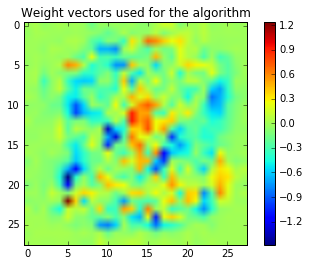

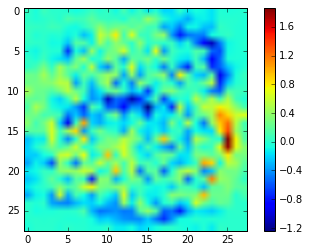

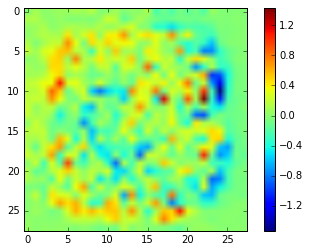

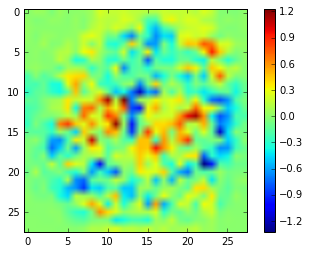

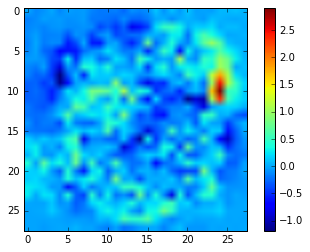

Average accuracy for all classes in the train set 0.955479
Accuracies for each class (0.9890806622050018, 0.9329710144927537, 0.8929621642815134, 0.9864169582218564, 0.9753661784287616)


Average accuracy for all classes in the test set 0.944801
Accuracies for each class (0.9887218045112782, 0.9282828282828283, 0.8844660194174757, 0.9745676500508647, 0.9475409836065574)


In [46]:
# Inititalizing tensor flow variables
init = tf.global_variables_initializer()
##################################################
# Main
##################################################
with tf.Session() as sess:
    sess.run(init)
    for iter in range(iterations):
# bs is the batch size for the SGD
        bs = 100
        x_rand=[];y_rand=[]
        for i in range(bs):
            l=random.randint(0,25111)
            x_rand.append(x[l])
            y_rand.append(y[l])
        sess.run(update,feed_dict={x_:x_rand, y_:y_rand})
    plt.title("Weight vectors used for the algorithm")   
    for i in range(5):
        Img = W.eval()[0:784,i].reshape(28,28)
        plt.imshow(Img)
        plt.colorbar()
        plt.show()
    w1 = W.eval()[0:784][:,0];w2 = W.eval()[0:784][:,1];
    w3 = W.eval()[0:784][:,2];w4 = W.eval()[0:784][:,3];
    w5 = W.eval()[0:784][:,4];
    w0 = W.eval()[784:785]

    p = sess.run(pred,feed_dict={x_ : x})
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(p,1))
    avg_accuracy = 	tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print "Average accuracy for all classes in the train set" ,(avg_accuracy.eval())
    accuracies =error(tf.argmax(y,1).eval(),tf.argmax(p,1).eval())
    print "Accuracies for each class",accuracies
    print ("\n")
    
####################################################
#Test data for predicting performance on test set
#####################################################
    p=sess.run(pred,feed_dict={x_:x_test})
    correct_prediction = tf.equal(tf.argmax(y_test,1), tf.argmax(p,1))
    avg_accuracy =tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    print "Average accuracy for all classes in the test set" ,(avg_accuracy.eval())
    accuracies =error(tf.argmax(y_test,1).eval(),tf.argmax(p,1).eval())
    print "Accuracies for each class",accuracies
    
